<a href="https://colab.research.google.com/github/Niharikasingh722/Neural-Networks/blob/main/WA_Fn_UseC__Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd

In [59]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [60]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.shape

(7043, 21)

In [62]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
df.drop(['customerID'],axis=1,inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [65]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

Looks like some of the total charges are empty strings.

In [66]:
df['TotalCharges'][df['TotalCharges']==" "]


488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

Only few rows have empty Total charges, since dropping those rows

In [67]:
df_new=df[df['TotalCharges']!=" "]

In [68]:
df_new.shape

(7032, 20)

In [69]:
df_new['TotalCharges']=pd.to_numeric(df_new['TotalCharges'])

<ipython-input-69-e064ad0a863f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['TotalCharges']=pd.to_numeric(df_new['TotalCharges'])


In [70]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [71]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# @title MonthlyCharges vs TotalCharges

import seaborn as sns
#df_new.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges', s=32, alpha=.8,hue='Churn')
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_new,x='MonthlyCharges', y='TotalCharges', s=32, alpha=.8,hue='Churn')
#plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [ ]:
# @title tenure


#df_new['tenure'].plot(kind='hist', bins=20, title='tenure',)
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
sns.histplot((df_new[df_new['Churn']=='Yes']['tenure']),ax=ax1)
sns.histplot(x=df_new[df_new['Churn']=='No']['tenure'],ax=ax2)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title SeniorCitizen

from matplotlib import pyplot as plt
df_new['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_new,x='Churn')
#plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [ ]:
df_new.info()

In [72]:
def print_cat_unique_values(df_new):
  for col in df_new:
    if df_new[col].dtypes=='object':
      print(f'{col} : {df_new[col].unique()}')

In [73]:
print_cat_unique_values(df_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [74]:
df_new.replace(to_replace='No phone service',value='No',inplace=True)
df_new.replace(to_replace='No internet service',value='No',inplace=True)

<ipython-input-74-fb469b754539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(to_replace='No phone service',value='No',inplace=True)
<ipython-input-74-fb469b754539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(to_replace='No internet service',value='No',inplace=True)


In [75]:
print_cat_unique_values(df_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [76]:
df_new.replace(to_replace='Yes',value=1,inplace=True)
df_new.replace(to_replace='No',value=0,inplace=True)

<ipython-input-76-c3b39ef7fb3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test=df_new.replace(to_replace='Yes',value=1,inplace=True)
<ipython-input-76-c3b39ef7fb3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test=df_new.replace(to_replace='No',value=0,inplace=True)


In [78]:
print_cat_unique_values(df_new)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [79]:
for col in df_new:
    print(f'{col} : {df_new[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [80]:
df_new['gender'].replace({'Female':1,'Male':0},inplace=True)


<ipython-input-80-c413cdcba628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'].replace({'Female':1,'Male':0},inplace=True)


In [82]:
df_new['InternetService'].replace({0:'No'},inplace=True)

<ipython-input-82-b9398563c4e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InternetService'].replace({0:'No'},inplace=True)


In [83]:
df_final=pd.get_dummies(data=df_new,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [84]:
df_final.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [85]:
df_final.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [87]:
for col in df_final:
    print(f'{col} : {df_final[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [90]:
from sklearn.preprocessing import MinMaxScaler
cols_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
df_final[cols_scale]=scaler.fit_transform(df_final[cols_scale])

In [91]:
for col in df_final:
    print(f'{col} : {df_final[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

Train Test Split

In [92]:
X=df_final.drop(['Churn'],axis=1)
y=df_final['Churn']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [96]:
X_train.shape

(4922, 23)

In [94]:
import tensorflow as tf
from tensorflow import keras


In [95]:
import numpy as np

In [102]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(23,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])

In [103]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
154/154 [==============================] - 1s 2ms/step - loss: 0.5977 - accuracy: 0.6445
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7657
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7987
Epoch 4/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8017
Epoch 5/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8029
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8046
Epoch 7/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8060
Epoch 8/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8068
Epoch 9/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8090
Epoch 10/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8072

In [105]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.7863


[0.44773808121681213, 0.7862558960914612]

In [106]:
y_pred=model.predict(X_test)

66/66 [==============================] - 0s 2ms/step


In [107]:
y_pred

array([[0.01205305],
       [0.15014821],
       [0.753859  ],
       ...,
       [0.00754708],
       [0.2634753 ],
       [0.17336565]], dtype=float32)

In [108]:
y_predicted=[]
for i in y_pred:
  if i<.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)

In [109]:
y_predicted[:5]

[0, 0, 1, 0, 0]

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.61      0.54      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



Text(58.222222222222214, 0.5, 'true')

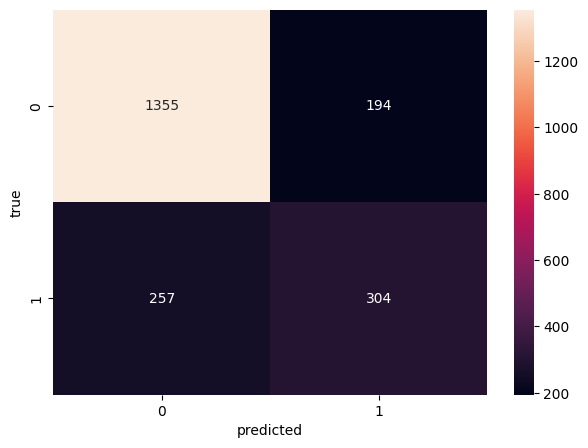

In [114]:
cm=tf.math.confusion_matrix(y_test,y_predicted)

import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("true")